<a href="https://colab.research.google.com/github/langodayyy/pcvk/blob/main/pcvk_week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

original_img = cv2.imread('/content/drive/MyDrive/pcvk/female.tiff')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Buat Gamma Correction sesuai dengan petunjuk berikut <br>
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


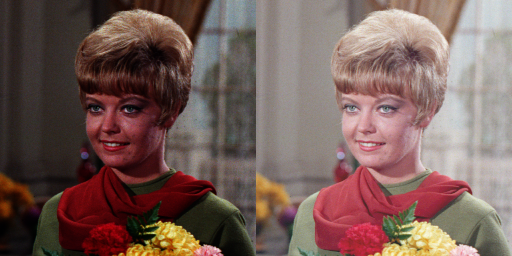

In [6]:
def gamma_correction(image, gamma):
  invGamma = 1.0/gamma
  table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
  return cv2.LUT(image, table)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

gamma_img = gamma_correction(original_img, gamma)
cv2_imshow(cv2.hconcat([original_img, gamma_img]))

2. Buat Simulasi Image Depth <br>
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 2^7 = 128, dst.

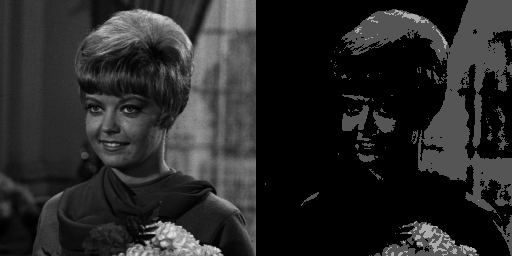

In [7]:

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
gray_image = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
depth_image = np.zeros(gray_image.shape, gray_image.dtype)
depth_image = (np.floor(gray_image / level) * level).astype('uint8')
cv2_imshow(cv2.hconcat([gray_image, depth_image]))

3. Buat modul Average Denoising <br>
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

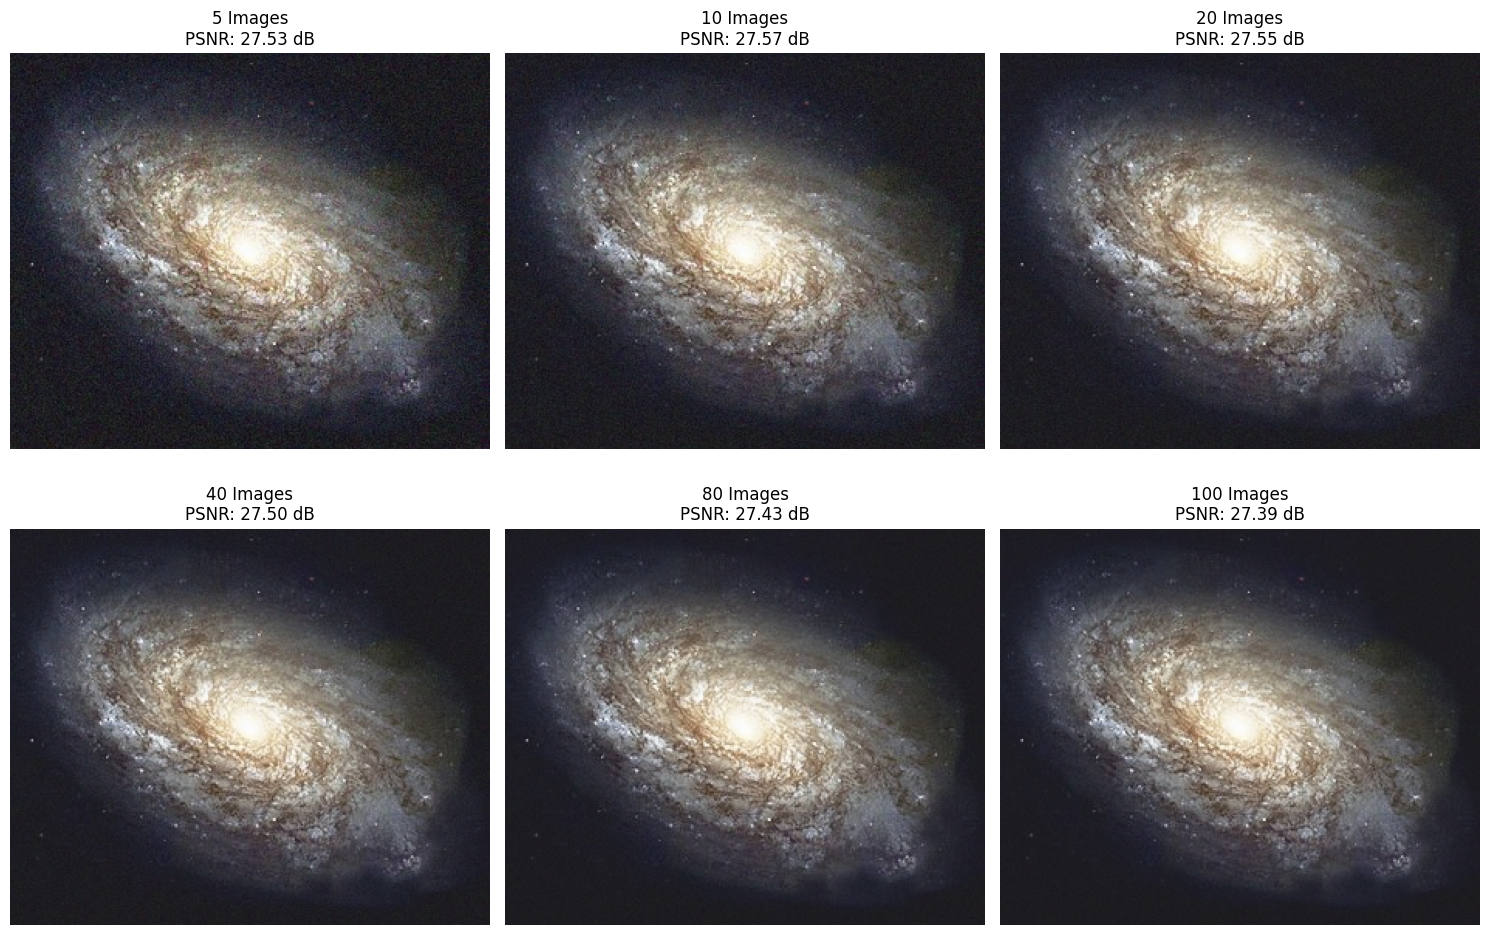

In [8]:
import glob
from math import log10, sqrt
import matplotlib.pyplot as plt

original_img = cv2.imread('/content/drive/MyDrive/pcvk/galaxy.jpg')


# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/noises/*.jpg'):
 n= cv2.imread(img)

 cv_img.append(n)


rows = 2
cols = 3

test_images_counts = [5, 10, 20, 40, 80, 100]
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

for index, num_images in enumerate(test_images_counts):
    average_img = np.zeros(cv_img[0].shape, np.float32)

    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv2.convertScaleAbs(denoised_img)

    psnr_value = PSNR(original_img, denoised_img)

    row = index // cols
    col = index % cols

    axs[row, col].imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(f'{num_images} Images\nPSNR: {psnr_value:.2f} dB')
    axs[row, col].axis('off')

for idx in range(len(test_images_counts), rows * cols):
    row = idx // cols
    col = idx % cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()
